In [1]:
import numpy as np
import cv2
import os
import random
from PIL import Image
import matplotlib.pyplot as plt
import time

In [2]:
t1_start = time.time()
path= 'eigenfaces_dataset/train_images/'
DEFAULT_SIZE = [250, 250] 
def get_images(image_path=path,default_size=DEFAULT_SIZE):
    images = []
    labels = []
    image_dirs = [image for image in os.listdir(image_path) if not image.startswith('.')]
    for image_dir in image_dirs:
        dir_path = os.path.join(image_path, image_dir)
        image_names = [image for image in os.listdir(dir_path) if not image.startswith('.')]
        for image_name in image_names:
            image = Image.open (os.path.join(dir_path, image_name))
            image = image.convert ("L")
            # resize to given size (if given )
            if (default_size is not None ):
                image = image.resize (DEFAULT_SIZE , Image.ANTIALIAS )
         
            images.append(np.asarray (image , dtype =np. uint8 ))
            labels.append(image_dir)
    return [images,labels]

In [3]:
[images_train, labels_train] = get_images(path)
print(len(labels_train))
def as_row_matrix (images_train):
    if len (images_train) == 0:
        return np. array ([])
    mat = np. empty ((0 , images_train [0].size ), dtype =images_train [0]. dtype )
    for row in images_train:
        mat = np.vstack(( mat , np.asarray( row ).reshape(1 , -1))) # 1 x r*c 
    return mat

70


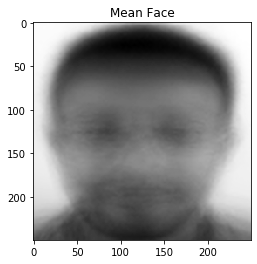

In [4]:
mean = np.reshape(as_row_matrix(images_train).mean( axis =0), images_train[0].shape)
plt.imshow(mean, cmap=plt.cm.gray)
plt.title("Mean Face")
plt.show()

In [5]:
# def split_training_and_test(images,labels):
#     # Split the total data into training and test data
#     images_train, images_test, labels_train, labels_test = train_test_split(images, labels, test_size = 0.2, random_state = 0)
#     return images_train, images_test, labels_train, labels_test

In [6]:

def Eigenface_model(images_train, labels_train):
    # subtract mean face from all faces
    shifted_image_asrow = as_row_matrix(images_train)
    mean = as_row_matrix(images_train).mean(axis=0, keepdims=True)
    images_train = shifted_image_asrow - mean
    
    # compute covariance matrix
    cov = np.dot(images_train,np.transpose(images_train))
    
    # get the eigen values and eigen vectors for X'X
    [eigval, eigv] = np.linalg.eig(cov)
    
    # get eigen vectors for XX'
    eigu = np.dot(images_train.T, eigv.real)
    
    # normalize eigen vectors
    ssq = np.sum(eigu ** 2, axis=0)
    ssq = ssq ** (1 / 2)
    eigu = eigu / ssq

    # arrange eigen values and hence eigen vecs in descending order of eigen values
    idx = np.argsort(-eigval.real)
    eigval = eigval[idx].real
    eigu = eigu[:, idx].real

    return[eigval, eigu, mean,shifted_image_asrow]

In [7]:
def subplot (title,images,rows,cols,sptitle ="",sptitles =[],colormap = plt.cm.gray,filename = None,figsize = (10, 10) ):
    fig = plt.figure(figsize = figsize)
    # main title
    fig.text (.5 ,.95,title,horizontalalignment ="center")
    for i in range (len(images)):
        ax0 = fig.add_subplot( rows , cols ,( i +1))
        plt.setp(ax0.get_xticklabels(),visible = False )
        plt.setp(ax0.get_yticklabels() , visible = False )
        if len(sptitles) == len ( images ):
            plt.title("%s #%s" % ( sptitle , str ( sptitles [i ]) )  )
        else:
            plt.title("%s #%d" % ( sptitle , (i +1) )  )
        plt.imshow(np.asarray(images[i]) , cmap = colormap )
    if filename is None :
        plt.show()
    else:
        fig.savefig( filename )

In [8]:
def Eigenface_test(images_test, labels_test,images_train,labels_train, weights, kbest, mean):

    # Normalize the test images
    test_image =as_row_matrix(images_test)
    test_images = test_image - mean
    labels_test = labels_test

    #Calculate test image weights
    testweights = np.dot(kbest.T,test_images.T)
    print("Test Image "+"           "+"Predicted Image")
    correct=0
    distace_holder=[]
    for i in range(0, len(labels_test)):
        # calculate error for each test image
        testweight = np.resize(testweights[:, i], (testweights.shape[0], 1))
        err = (weights - testweight) ** 2
     
        # calculate the sum of square of error
        ssq1 = np.sum(err ** (1/2), axis=0)

        # Find the closest face to the test image
        dist= ssq1.min(axis=0, keepdims=True)
        distace_holder.append(dist)
        match=labels_train[ssq1.argmin(axis=0)]
        
        index = 0 
        if (match == 'Aron'):
            index = random.randint(0, 6)
        elif (match == 'Birhanu'):
            index = random.randint(7, 13)
        elif (match == 'Eden'):
            index = random.randint(14, 20)
        elif (match == 'Eyob'):
            index = random.randint(21, 27)
        elif (match == 'Gebeyaw'):
            index = random.randint(28, 34)
        elif (match == 'Isayas'):
            index = random.randint(35, 41)
        elif (match == 'Merihun'):
            index = random.randint(42, 48)
        elif (match == 'Sileshi'):
            index = random.randint(49, 55)
        elif (match == 'Tesfaye'):
            index = random.randint(56, 62)
        elif (match == 'TesfayeAbera'):
            index = random.randint(63, 69)
#         print("Max",max(distace_holder))    
        if dist < max(distace_holder):
            if labels_test[i] == match:
                correct+=1
                subplot ( title ="", images =[images_test[i], images_train[index]], rows =6, cols =6, 
                  sptitles = ["Unkown Face",match],colormap =plt.cm.gray,filename ="prediction_test.png", figsize = (15,15))
            else:
                print ("subject identified incorrectly as with distance:",(labels_test[i], match, dist.real))
        else:
            print ("subject face not match in database")
#     print("\n",max(distace_holder))
    print("The accuracy of Eigenfaces is %f percent" % (correct*100 / len(labels_test)))

    

Test Image            Predicted Image
subject face not match in database
subject identified incorrectly as with distance: ('Isayas', 'Gebeyaw', array([33024.48783875]))
subject face not match in database


C:\Users\Sileshi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


The accuracy of Eigenfaces is 90.000000 percent

Elapsed Time During  The Operation: 8.380635738372803


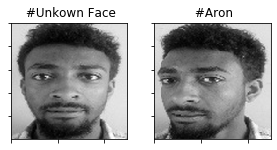

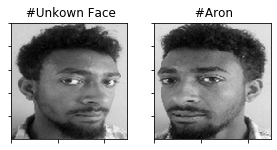

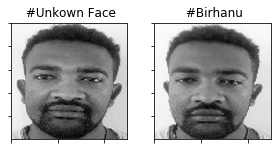

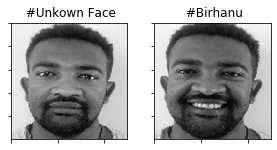

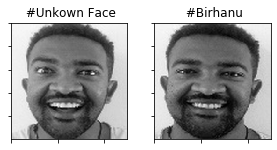

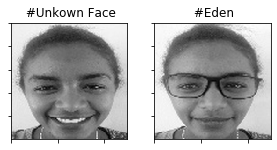

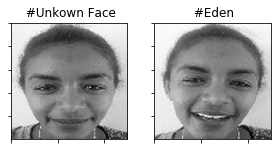

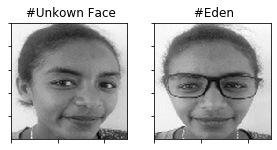

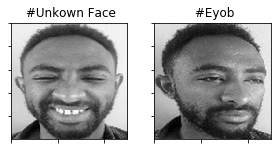

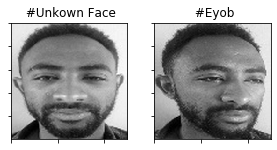

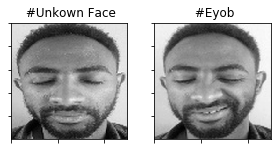

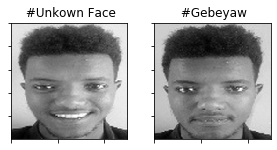

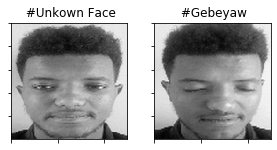

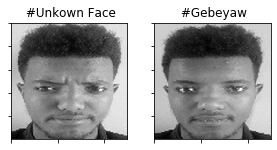

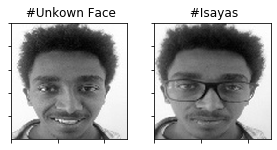

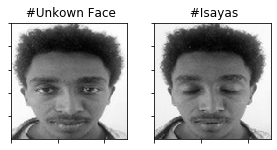

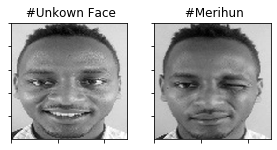

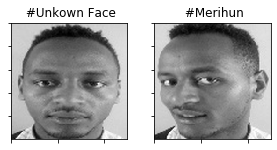

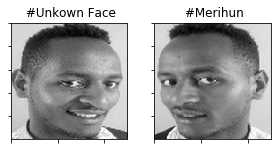

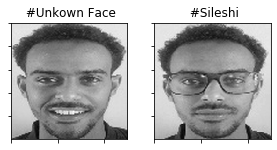

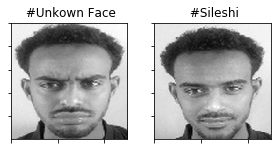

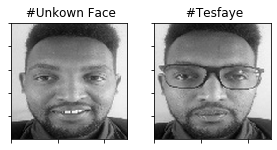

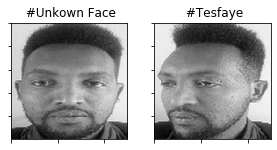

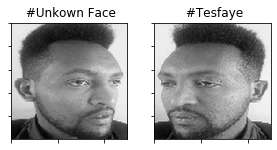

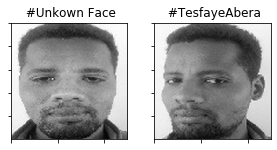

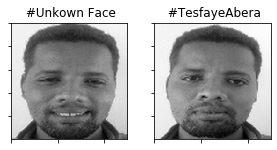

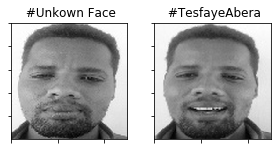

In [9]:

# Main program
if __name__ == "__main__":

    # Get the images and labels from path
    #path = 'E:/computer_vision/eigenfaces_dataset/train_images/'
    path= 'eigenfaces_dataset/train_images/'
    images_train, labels_train = get_images(path)

    # Split the data into training and test
    #path = 'E:/computer_vision/eigenfaces_dataset/test_images/'
    path= 'eigenfaces_dataset/test_images/'
    images_test, labels_test = get_images(path)

    # Perform Eigenface analysis and get Eigenface vectors
    [eigval, eigu, mean,shifted_image]= Eigenface_model(images_train, labels_train)
    # Get the k best eigen vectors
    sum1 = np.sum(eigval, axis=0)
    k = 0
    for i in range(0, len(labels_train)):
        k += eigval[i] / sum1
        if k > 0.95:
            break
    kbest = eigu[:, 3:i + 3]
    # Get the weights of the of eigenfaces for each input image
    weights = np.dot(kbest.T, (shifted_image - mean).T)
    # Test the Eigenface model on the test images and print the result
    Eigenface_test(images_test, labels_test,images_train,labels_train, weights, kbest, mean)
    t1_stop = time.time()
    print("\nElapsed Time During  The Operation:",t1_stop-t1_start)